In [71]:
import pandas as pd
#depriciation errors
import warnings
warnings.filterwarnings('ignore')

In [140]:
#data scraped from
f = open("debate.txt", "r")
string = f.read()
string = string.split('\n')
#getting list of names
lon = string[::3]
#getting list of text
lot = string[1::3]
#creating DataFrame
df = pd.DataFrame({"Name":lon, "Text":lot})
#splitting Name into Time and Name
df['Name'], df['Time'] = df['Name'].str.split(':', 1).str
#removing perenthesis from name
df['Time'] = df['Time'].str.strip(' ()')
#drop na rows
df.dropna(inplace=True)

In [141]:
df.head()

,Name,Text,Time
0,Chris Wallace,Good evening from the Health Education Campus ...,01:20
1,Chris Wallace,This debate is being conducted under health an...,02:10
2,Vice President Joe Biden,"How you doing, man?",02:49
3,President Donald J. Trump,How are you doing?,02:51
4,Vice President Joe Biden,I’m well.,02:51


## How many times did each person speak and how many words did they get in

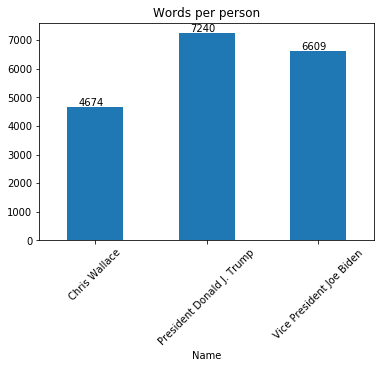

In [178]:
df['Word count'] = df['Text'].str.split().apply(len)
word_count  = df.groupby('Name').sum()
ax = word_count.plot(kind='bar', legend=False, title='Words per person', rot=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+40))

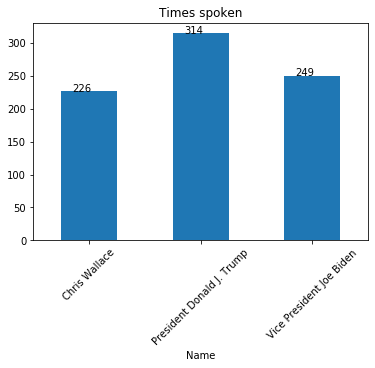

In [190]:
ax = df.groupby('Name')['Text'].count().plot(kind='bar', legend=False, title='Times spoken', rot=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()))

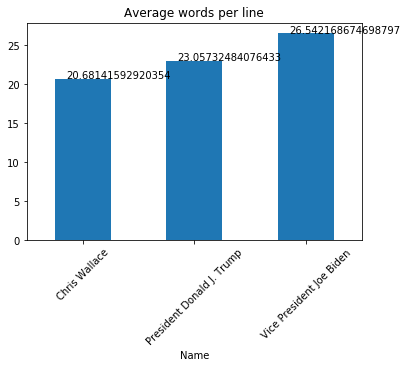

In [197]:
ax = df.groupby('Name').mean().plot(kind='bar', legend=False, title='Average words per line', rot=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()))